### Note: Try to integrate R and Python in the same notebook in the future.

In [1]:
#analysis packages
import gen_analysis as gn
import pandas as pd
import numpy as np
import scipy as sp

#plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

#generate higher resolution plots
%config InlineBackend.figure_format='retina'

### In this jupyter notebook, I will analyze the length and extent of calcification of mouse radial bones after drug treatment.

In [2]:
#read in files
pbs = pd.read_csv("PBS.csv", header = None).dropna()
pbs = pbs.reset_index(drop = True)

ste = pd.read_csv("STE.csv", header = None).dropna()
ste = ste.reset_index(drop = True)

cb = pd.read_csv("CB.csv", header = None).dropna()
cb = cb.reset_index(drop = True)

cb_10 = pd.read_csv("CB_10X.csv", header = None).dropna()
cb_10 = cb_10.reset_index(drop = True)

In [3]:
#look at top 5 entries
pbs.head()

,0,1,2,3,4
0,22B,0.334,0.325,0.156,0.134
1,22D,0.258,0.333,0.146,0.169
2,27G,0.260,0.265,0.168,0.128
3,27H,0.310,0.333,0.156,0.138
4,31A,0.340,0.307,0.181,0.190


In [4]:
#list of dataframes
treatments = [pbs, ste, cb, cb_10]
labels = ["PBS", "Snus", "Camel Blue", "CB < 10X"]
location = ["left arm", "right arm", "left arm calcium", "right arm calcium"]

#calculate ecdf for all
ecdf_values = []
for i in range(4):
    for j in range(1,5):
        ecdf = gn.ecdf.values(treatments[i][j].values, labels[i])
        ecdf["location"] = location[j-1]
        ecdf["ID"] = treatments[i][0]
        ecdf_values.append(ecdf)

In [5]:
#The length of list makes sense
len(ecdf_values)

16

In [6]:
#take a look
ecdf_values[1].head()

,ecdf,Label,Values,location,ID
0,0.020408,PBS,0.262,right arm,22B
1,0.040816,PBS,0.265,right arm,22D
2,0.061224,PBS,0.277,right arm,27G
3,0.081633,PBS,0.296,right arm,27H
4,0.102041,PBS,0.299,right arm,31A


In [7]:
#organize list by location
left_arm = []
right_arm = []
left_arm_calcium = []
right_arm_calcium = []

for i in range(0,16):
    if (ecdf_values[i]["location"] == "left arm").all() == True:
        left_arm.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "right arm").all() == True:
        right_arm.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "left arm calcium").all() == True:
        left_arm_calcium.append(ecdf_values[i])
    else:
        right_arm_calcium.append(ecdf_values[i])

In [8]:
left_arm[0].head()

,ecdf,Label,Values,location,ID
0,0.020408,PBS,0.258,left arm,22B
1,0.040816,PBS,0.260,left arm,22D
2,0.061224,PBS,0.300,left arm,27G
3,0.081633,PBS,0.303,left arm,27H
4,0.102041,PBS,0.306,left arm,31A


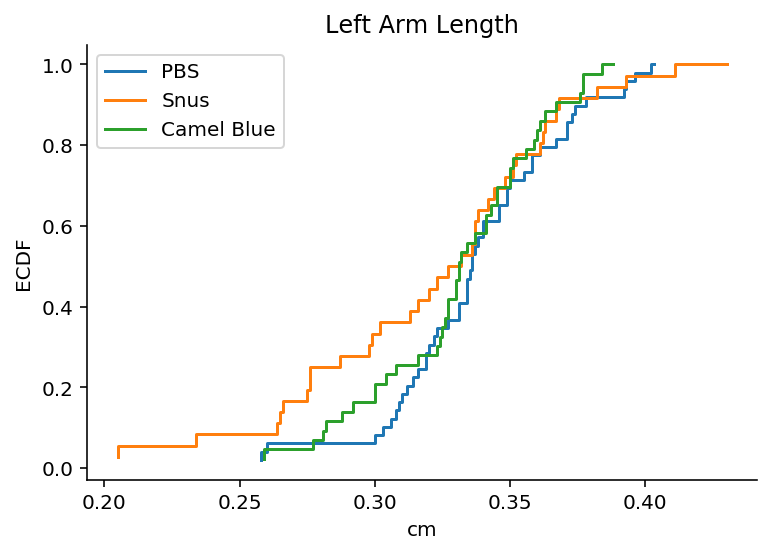

In [9]:
for i in range(3):
    plt.step(left_arm[i]["Values"], left_arm[i]["ecdf"], label = left_arm[i]["Label"][0])
plt.legend()
plt.title("Left Arm Length")
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

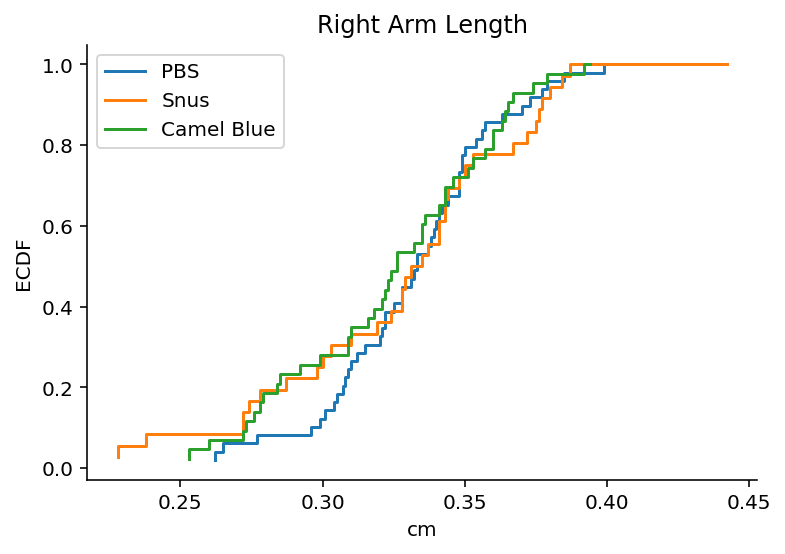

In [10]:
for i in range(3):
    plt.step(right_arm[i]["Values"], right_arm[i]["ecdf"], label = right_arm[i]["Label"][0])
plt.title("Right Arm Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

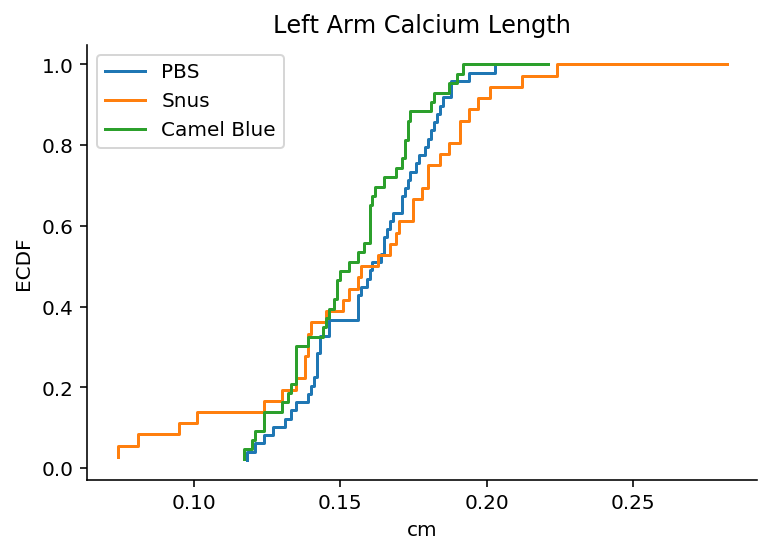

In [11]:
for i in range(3):
    plt.step(left_arm_calcium[i]["Values"], left_arm_calcium[i]["ecdf"], 
             label = left_arm_calcium[i]["Label"][0])
plt.title("Left Arm Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

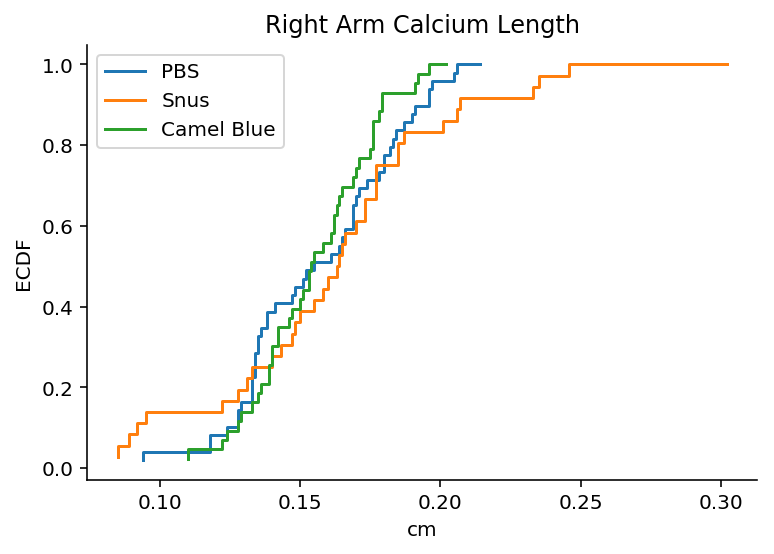

In [12]:
for i in range(3):
    plt.step(right_arm_calcium[i]["Values"], right_arm_calcium[i]["ecdf"],
             label = right_arm_calcium[i]["Label"][0])
plt.title("Right Arm Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

In [13]:
list_all = [left_arm, right_arm, left_arm_calcium, right_arm_calcium]
all_data = [pd.concat(i) for i in list_all] 

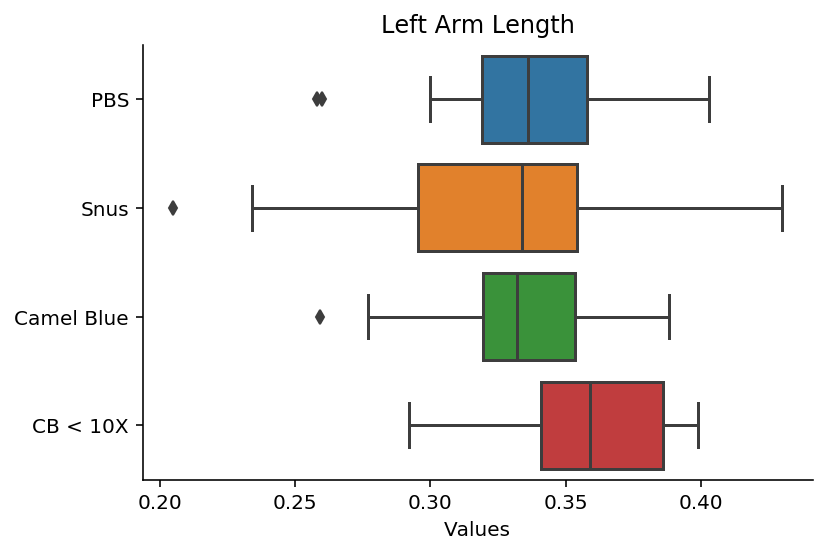

In [14]:
sns.boxplot(all_data[0]["Values"], all_data[0]["Label"])
plt.title("Left Arm Length")
plt.ylabel("")
sns.despine()

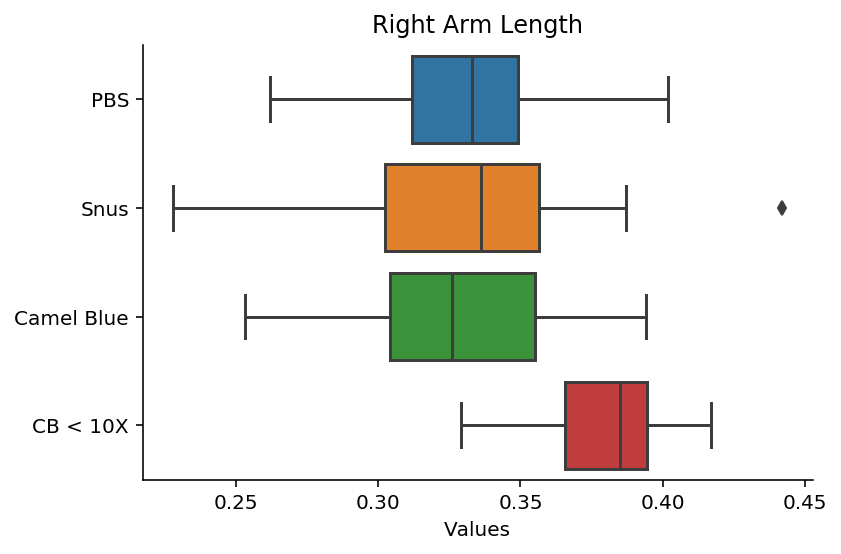

In [15]:
sns.boxplot(all_data[1]["Values"], all_data[1]["Label"])
plt.title("Right Arm Length")
plt.ylabel("")
sns.despine()

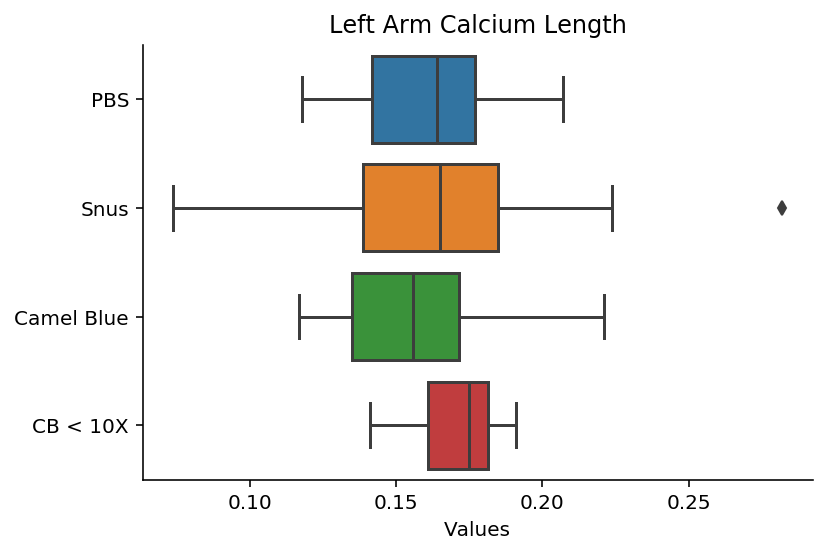

In [16]:
sns.boxplot(all_data[2]["Values"], all_data[2]["Label"])
plt.title("Left Arm Calcium Length")
plt.ylabel("")
sns.despine()

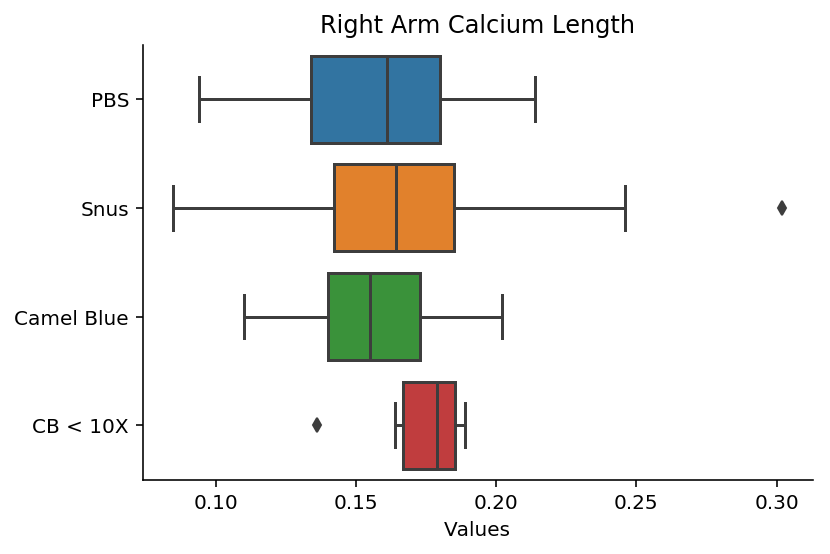

In [17]:
sns.boxplot(all_data[3]["Values"], all_data[3]["Label"])
plt.title("Right Arm Calcium Length")
plt.ylabel("")
sns.despine()

### We will now look at normalized calcium length.

In [18]:
#normalize calcium
all_data[2]["Normalized Calcium"] = all_data[2]["Values"]/all_data[0]["Values"]
all_data[3]["Normalized Calcium"] = all_data[3]["Values"]/all_data[1]["Values"]

In [19]:
#remove CB < 10X
left_arm_alldata = all_data[2].loc[all_data[2]["Label"] != "CB < 10X"]
right_arm_alldata = all_data[3].loc[all_data[3]["Label"] != "CB < 10X"]

In [20]:
#export csv
left_arm_alldata.to_csv("left_arm_normalized_calcium.csv")
right_arm_alldata.to_csv("right_arm_normalized_calcium.csv")

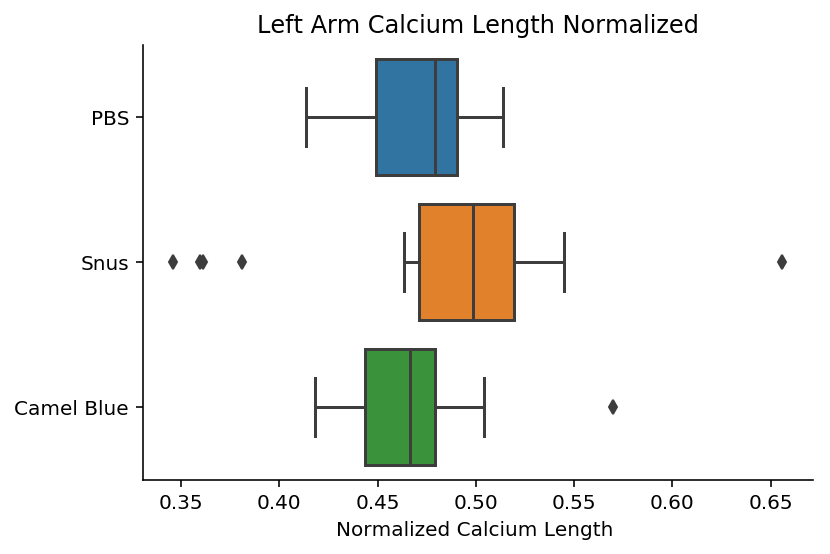

In [21]:
sns.boxplot(left_arm_alldata["Normalized Calcium"], left_arm_alldata["Label"])
plt.title("Left Arm Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length ")
sns.despine()

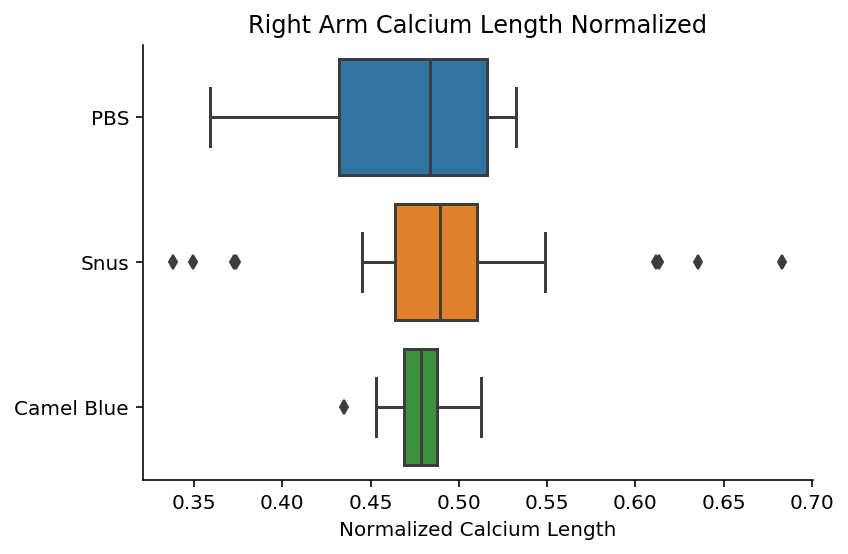

In [22]:
sns.boxplot(right_arm_alldata["Normalized Calcium"], right_arm_alldata["Label"])
plt.title("Right Arm Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length")
sns.despine()

In [23]:
all_data[2]

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.020408,PBS,0.118,left arm calcium,22B,0.457364
1,0.040816,PBS,0.121,left arm calcium,22D,0.465385
2,0.061224,PBS,0.124,left arm calcium,27G,0.413333
3,0.081633,PBS,0.127,left arm calcium,27H,0.419142
4,0.102041,PBS,0.131,left arm calcium,31A,0.428105
5,0.122449,PBS,0.133,left arm calcium,31B,0.431818
6,0.142857,PBS,0.135,left arm calcium,31C,0.436893
7,0.163265,PBS,0.139,left arm calcium,31E,0.448387
8,0.183673,PBS,0.140,left arm calcium,32A,0.448718
9,0.204082,PBS,0.141,left arm calcium,32C,0.449045


In [24]:
labels = ["PBS", "Snus", "Camel Blue"]

left_arm_calcium = [all_data[2].loc[all_data[2]["Label"] == i] for i in labels]
right_arm_calcium = [all_data[3].loc[all_data[3]["Label"] == i] for i in labels]

In [25]:
left_arm_calcium[0].head()

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.020408,PBS,0.118,left arm calcium,22B,0.457364
1,0.040816,PBS,0.121,left arm calcium,22D,0.465385
2,0.061224,PBS,0.124,left arm calcium,27G,0.413333
3,0.081633,PBS,0.127,left arm calcium,27H,0.419142
4,0.102041,PBS,0.131,left arm calcium,31A,0.428105


In [26]:
#calculate ecdf for all post normalization
combine_cal = [left_arm_calcium, right_arm_calcium]

ecdf_values = []
for i in range(2):
    for j in range(3):
        ecdf = gn.ecdf.values(combine_cal[i][j]["Normalized Calcium"].values, combine_cal[i][j]["Label"][0])
        ecdf["ID"] = combine_cal[i][j]["ID"]
        ecdf_values.append(ecdf)

In [27]:
#organize list by location post normalization
left_arm_calcium_norm = []
for i in range(3):
    left_arm_calcium_norm.append(ecdf_values[i])
    
right_arm_calcium_norm = []
for i in range(3,6):
    right_arm_calcium_norm.append(ecdf_values[i])

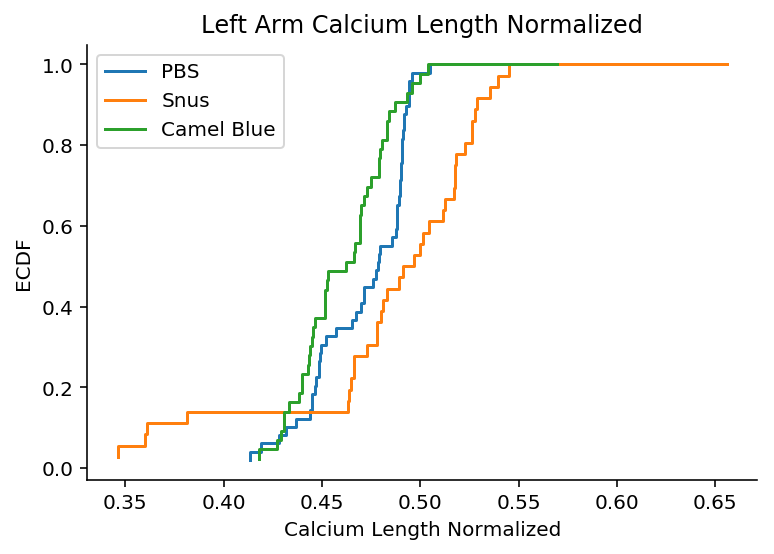

In [28]:
for i in range(3):
    plt.step(left_arm_calcium_norm[i]["Values"], left_arm_calcium_norm[i]["ecdf"],
             label = left_arm_calcium_norm[i]["Label"][0])
plt.title("Left Arm Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
sns.despine()

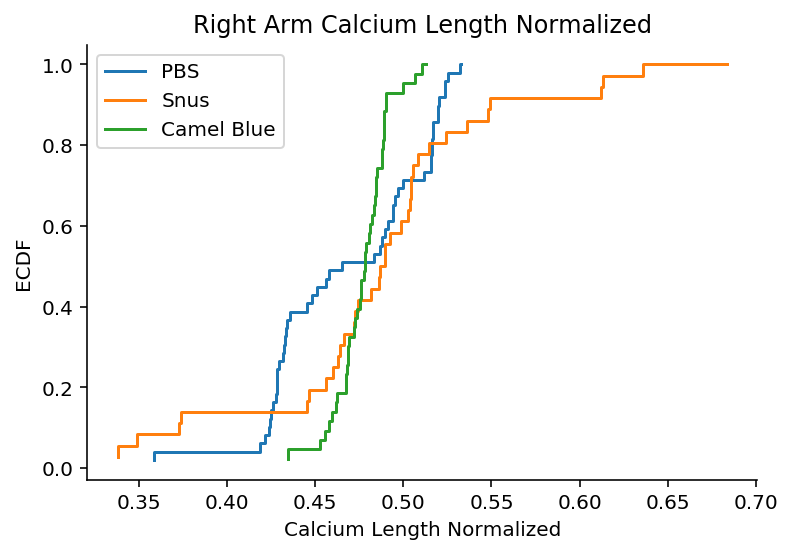

In [29]:
for i in range(3):
    plt.step(right_arm_calcium_norm[i]["Values"], right_arm_calcium_norm[i]["ecdf"],
             label = right_arm_calcium_norm[i]["Label"][0])
plt.title("Right Arm Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

### Combined arms

In [30]:
arm_combined = [pd.concat([left_arm_calcium_norm[i], right_arm_calcium_norm[i]]) for i in range(3)]

In [31]:
#calculate ecdf after combining arms
ecdf_values = []
for i in range(3):
    ecdf = gn.ecdf.values(arm_combined[i]["Values"].values, arm_combined[i]["Label"].iloc[0])
    ecdf["ID"] = arm_combined[i]["ID"].reset_index(drop = True)
    ecdf_values.append(ecdf)

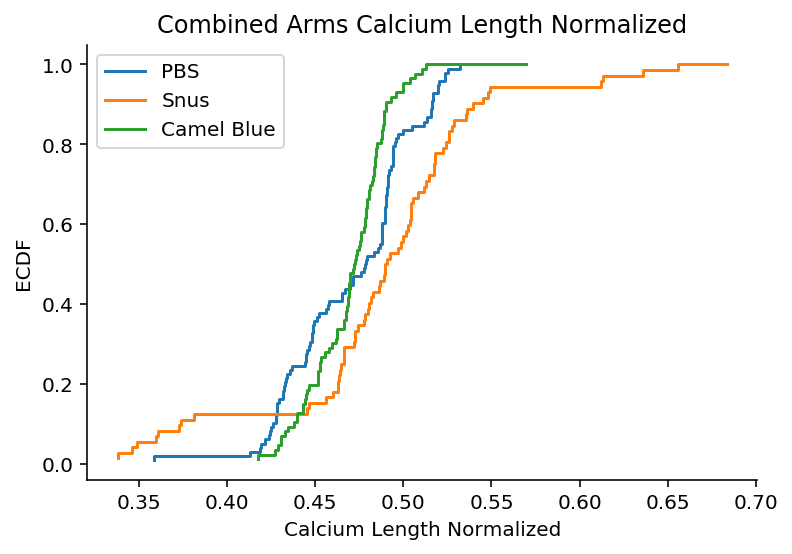

In [32]:
for i in range(3):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0])
plt.title("Combined Arms Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

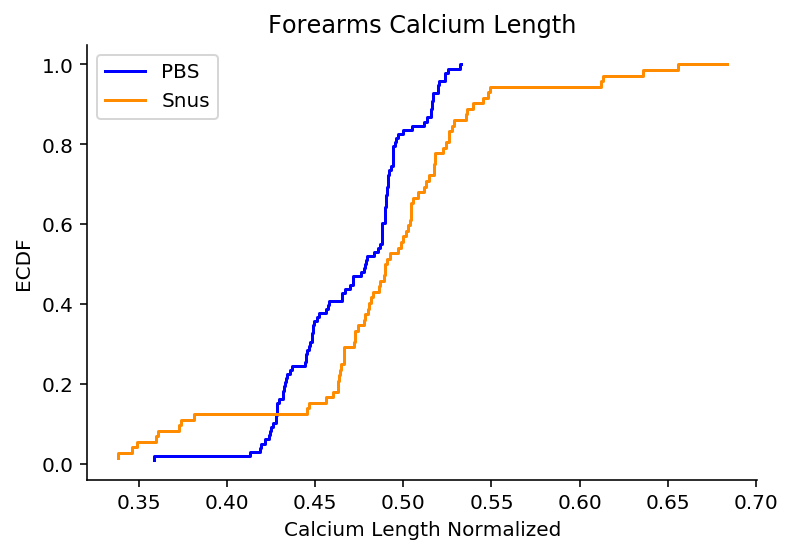

In [72]:
color = ["blue", "darkorange"]
j = 0 
for i in range(2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Forearms Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

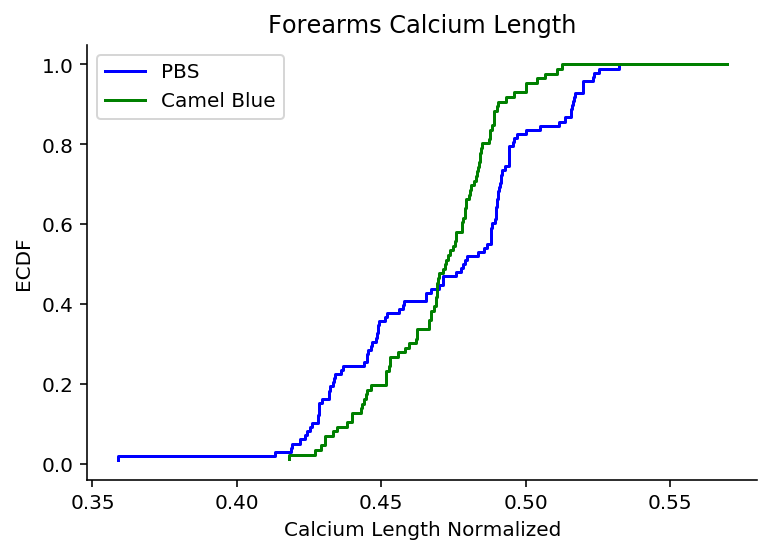

In [73]:
color = ["blue", "green"]
j = 0 
for i in np.arange(0,3,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Forearms Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

In [74]:
np.arange(0,3,2)

array([0, 2])

In [75]:
#combined dataframe
combined = pd.concat(ecdf_values)
combined.to_csv("combined_arms_normalized.csv")

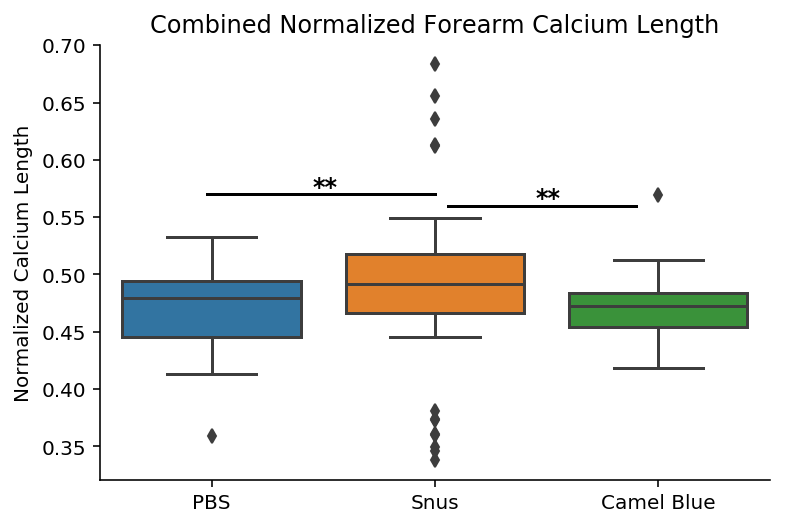

In [35]:
sns.boxplot(combined["Label"], combined["Values"])
plt.ylabel("Normalized Calcium Length")
plt.xlabel("")
plt.title("Combined Normalized Forearm Calcium Length")
plt.annotate("**", (0.45,0.57), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.annotate("**", (1.45,0.56), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.57, xmin=0.16, xmax=0.5, color = "k")
plt.axhline(y=0.56, xmin=0.52, xmax=0.8, color = "k")
sns.despine()

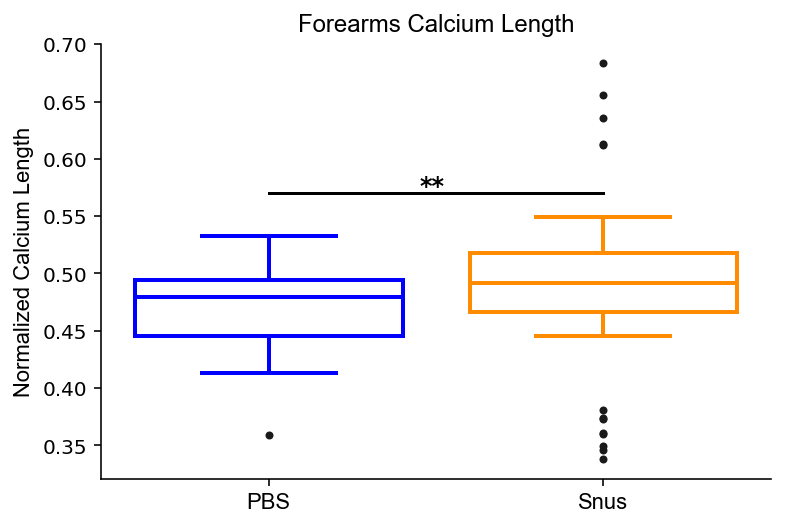

In [94]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Camel Blue"]["Label"]),
            (combined.loc[combined["Label"] != "Camel Blue"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "darkorange"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Forearms Calcium Length", fontname = "Arial")
plt.annotate("**", (0.45,0.57), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.57, xmin=0.25, xmax=.75, color = "k")
sns.despine()

In [53]:
(combined.loc[combined["Label"] != "Camel Blue"])["Label"]

0      PBS
1      PBS
2      PBS
3      PBS
4      PBS
5      PBS
6      PBS
7      PBS
8      PBS
9      PBS
10     PBS
11     PBS
12     PBS
13     PBS
14     PBS
15     PBS
16     PBS
17     PBS
18     PBS
19     PBS
20     PBS
21     PBS
22     PBS
23     PBS
24     PBS
25     PBS
26     PBS
27     PBS
28     PBS
29     PBS
      ... 
42    Snus
43    Snus
44    Snus
45    Snus
46    Snus
47    Snus
48    Snus
49    Snus
50    Snus
51    Snus
52    Snus
53    Snus
54    Snus
55    Snus
56    Snus
57    Snus
58    Snus
59    Snus
60    Snus
61    Snus
62    Snus
63    Snus
64    Snus
65    Snus
66    Snus
67    Snus
68    Snus
69    Snus
70    Snus
71    Snus
Name: Label, Length: 170, dtype: object

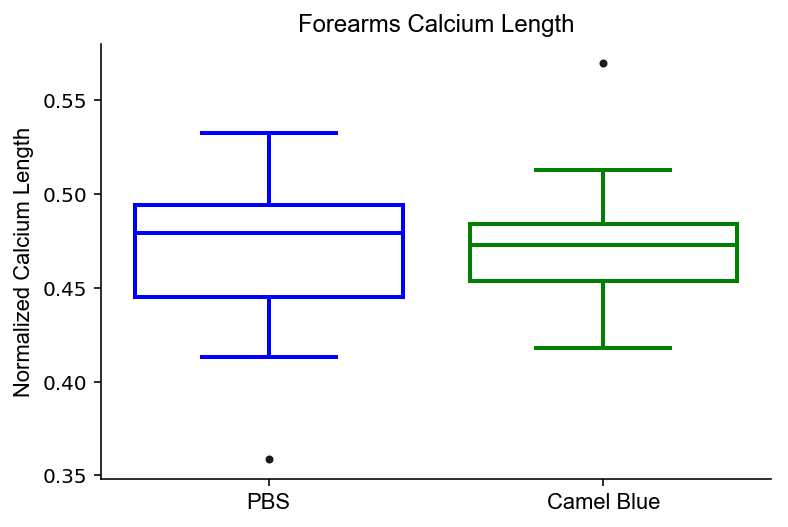

In [93]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Snus"]["Label"]),
            (combined.loc[combined["Label"] != "Snus"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "green"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Forearms Calcium Length", fontname = "Arial")
sns.despine()